In [1]:
# sales.csvをデータフレームに読み込んで出力

import pandas as pd
# ファイルを読み込んでdfに格納
df = pd.read_csv('sales.csv', encoding='cp932')
print(df)

      店舗   売上額  競合店  満足度  商品の充実度
0    赤坂店  7990    0    4       4
1    溜池店  8420    1    4       5
2    広尾店  3950    3    2       3
3    麻布店  6870    2    4       4
4   麻布十番  4520    3    3       2
5   恵比寿店  3480    2    3       3
6    高輪店  8900    0    4       4
7   西五反田  6280    1    3       3
8   東五反田  8180    1    3       4
9   不動前店  5330    1    3       3
10   飯倉店  3090    2    2       3
11   渋谷店  8600    0    3       4
12  中目黒店  3880    1    3       2
13  南青山店  7400    3    4       3
14  北青山店  4540    3    3       3
15  芝公園店  3450    2    3       3
16  泉岳寺店  2350    3    2       2
17  乃木坂店  8510    1    4       4
18  表参道店  4450    3    3       3
19  神宮前店  5320    2    3       2


In [2]:
# 3項目の要因の相関係数を調べる

import pandas as pd
import numpy as np
from sklearn import linear_model

# ファイルを読み込んでdfに格納
df = pd.read_csv('sales.csv', encoding='cp932')

# 競合店の数と売上額の相関係数を求める
print('競合店\n', np.corrcoef(df['競合店'], df['売上額']))            
# 顧客満足度と売上額の相関係数を求める
print('満足度\n', np.corrcoef(df['満足度'], df['売上額']))            
# 商品充実度と売上額の相関係数を求める
print('商品の充実度\n', np.corrcoef(df['商品の充実度'], df['売上額'])) 

競合店
 [[ 1.        -0.6692924]
 [-0.6692924  1.       ]]
満足度
 [[1.         0.77567537]
 [0.77567537 1.        ]]
商品の充実度
 [[1.         0.78037688]
 [0.78037688 1.        ]]


In [3]:
# すべての説明変数を使って重回帰分析を行う

import pandas as pd
import numpy as np
from sklearn import linear_model

# ファイルを読み込んでdfに格納
df = pd.read_csv('sales.csv', encoding='cp932') 

x = df.iloc[:, 2:5]                     # 競合店、満足度、商品の充実度の列
y = df['売上額']                        # 売上額の列
model = linear_model.LinearRegression() # LinearRegressionオブジェクトを生成
model.fit(x, y)                         # 線形重回帰分析を実行

print('回帰係数:', model.coef_)         # 係数aを取得
print('切片　　:', model.intercept_)    # 切片bを取得
print('決定係数:', model.score(x, y))   # 決定係数を取得

回帰係数: [-534.36299509 1413.39831276  942.08283685]
切片　　: -782.952671464659
決定係数: 0.8024493365630474


Text(0, 0.5, 'predict(y)')

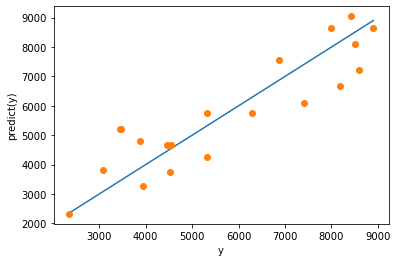

In [4]:
# 散布図を描画して回帰直線を引く

from matplotlib import pyplot as plt
%matplotlib inline

predict = model.predict(x)
# x=yの直線を描画
plt.plot(np.linspace(min(y),max(y)), # x軸: yの値
         np.linspace(min(y),max(y))  # y軸: yの値
         )
# 実測値をヨコ軸、予測値をタテ軸にとった散布図を描画
plt.plot(y,                          # x軸: yの値
         predict,                    # y軸: 予測値
         'o'
        )
plt.xlabel('y')                      # x軸ラベル
plt.ylabel('predict(y)')             # y軸ラベル